# Code to compare train and test stage of DL model


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns

sys.path.append('../')
from utils.io import *

In [2]:
project_dir = '../'
ml_dir = '{}ml/'.format(project_dir)
results_dir = '{}results/'.format(project_dir)

In [4]:
experiment_names = ['Exp_pytorch_cifar','Exp_pytorch_kaggle']
devices = ['cpu'] #,'cuda']

jcols = ['experiment_name','device','tag','duration','package_total','dram_total','nvidia_total','process_total']
exp_config_df_concat = pd.DataFrame()
epoch_df_concat = pd.DataFrame()
joules_df_concat = pd.DataFrame()
for exp_name in experiment_names:
    for device in devices:
        exp_config_csv = '{}{}/{}/experiment_config.csv'.format(results_dir,exp_name,device)
        epoch_csv = '{}{}/{}/epoch.csv'.format(results_dir,exp_name,device)
        joules_csv = '{}{}/{}/joules.csv'.format(results_dir,exp_name,device)

        exp_config_df = pd.read_csv(exp_config_csv)
        exp_config_df_concat = exp_config_df_concat.append(exp_config_df)

        epoch_df = pd.read_csv(epoch_csv)
        epoch_df['experiment_name'] = exp_name
        epoch_df['device'] = device
        epoch_df_concat = epoch_df_concat.append(epoch_df)
        
        
        joules_df = read_joules(joules_csv,device)
        joules_df['experiment_name'] = exp_name        
        joules_df_concat = joules_df_concat.append(joules_df[jcols])


exp_config_df_concat.head()

,Unnamed: 0,experiment_name,device,model,MAC,params,n_epochs,batch_size,optimizer,test_perf,train_compute_time,test_compute_time,experiment_compute_time
0,0,Exp_pytorch_cifar,cpu,ResNet_1,0.03 GMac,195.74 k,5,4,adam,72.150000,23.145483,0.252700,23.424391
0,0,Exp_pytorch_kaggle,cpu,unet,13.74 GMac,7.76 M,2,4,adam,0.468325,14.437769,0.113558,15.497507


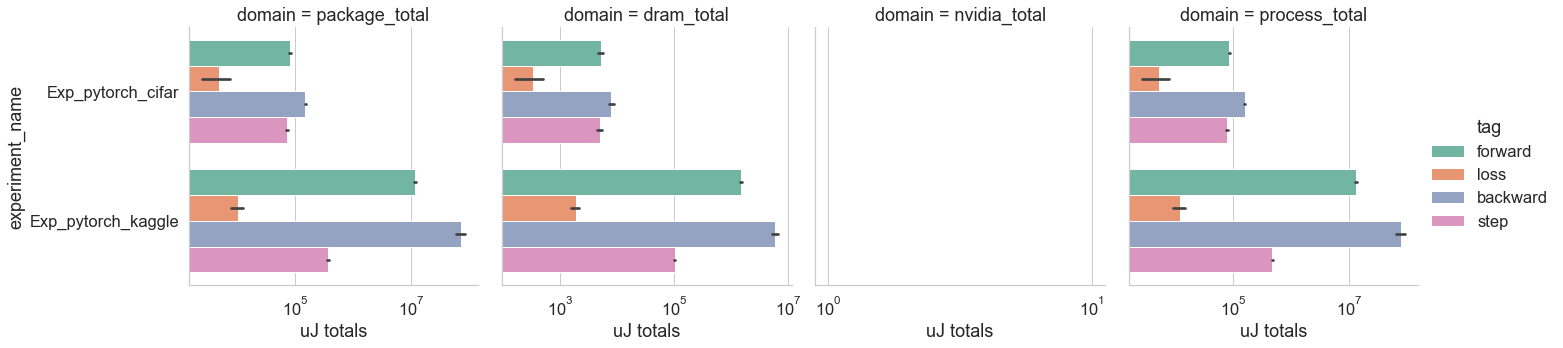

In [5]:
plot_df = joules_df_concat.copy()
plot_df = pd.melt(plot_df, id_vars=['experiment_name','device','tag','duration'], value_vars=['package_total','dram_total','nvidia_total','process_total'],
 var_name='domain', value_name='uJ totals')

sns.set(font_scale = 1.5)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y='experiment_name',x='uJ totals', hue='tag', col='domain', kind='bar', data=plot_df, palette='Set2',aspect=1, sharex=False)
    g.set(xscale="log")

In [12]:
running_loss = [.1,.4,.2]
100 * (1 - np.mean(running_loss)), 100 * (np.mean(1- np.array(running_loss)))

(76.66666666666667, 76.66666666666666)